In [94]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly_express as px

from datetime import datetime, timedelta

In [123]:
import sys
import os

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.paths import RAW_DATA_DIR, TRANSFORMED_DATA_DIR

In [96]:

wind_farms_data = pd.read_excel(f'{RAW_DATA_DIR}/Wind_data.xlsx',
                                parse_dates=['DATETIME'])

In [97]:
wind_farms_data.describe()

DATETIME           CF   WS_1133733   WS_1156770  \
count                           3635  3635.000000  3635.000000  3635.000000   
mean   2019-10-22 23:15:08.170564096     0.186114     4.532563     3.943094   
min              2019-08-07 00:00:00     0.003551     0.590000     0.490000   
25%              2019-09-14 17:30:00     0.043264     2.230000     2.050000   
50%              2019-10-22 14:00:00     0.130778     3.660000     3.220000   
75%              2019-11-30 08:30:00     0.299374     6.580000     5.500000   
max              2020-01-07 23:00:00     0.733128    14.660000    13.130000   
std                              NaN     0.165140     2.790853     2.371923   

        WS_1156968   WS_1182195   WS_1193865   WS_1321569   WS_1324653  \
count  3635.000000  3635.000000  3635.000000  3635.000000  3635.000000   
mean      5.124113     5.118909     5.558190     2.524281     3.927272   
min       0.680000     0.460000     0.530000     0.500000     0.310000   
25%       2.870000     2.790000     3.310000     1.490000     1.840000   
50%       4.780000     4.490000     5.360000     2.010000     3.340000   
75%       6.860000     6.560000     7.660000     2.980000     5.770000   
max      14.640000    23.040000    17.430000    13.200000    11.810000   
std       2.712505     3.213767     2.691479     1.655931     2.398751   

        WS_1358699  ...     WS_78208    WS_811655    WS_839753    WS_875373  \
count  3635.000000  ...  3635.000000  3635.000000  3635.000000  3635.000000   
mean      3.388721  ...     5.126252     4.689553     5.455680     4.789538   
min       0.240000  ...     0.690000     0.420000     0.410000     0.530000   
25%       1.350000  ...     2.620000     2.830000     3.090000     2.600000   
50%       2.460000  ...     4.420000     4.300000     4.910000     4.430000   
75%       4.400000  ...     7.280000     6.070000     7.275000     6.870000   
max      19.150000  ...    15.470000    15.780000    16.710000    13.530000   
std       2.834749  ...     2.988879     2.483077     3.005286     2.563520   

         WS_883683    WS_883699    WS_914573    WS_918665    WS_920775  \
count  3635.000000  3635.000000  3635.000000  3635.000000  3635.000000   
mean      6.083490     4.860514     5.756882     5.958355     5.699761   
min       0.640000     0.650000     0.740000     0.700000     0.490000   
25%       3.370000     2.490000     3.130000     3.310000     3.240000   
50%       5.430000     3.940000     5.050000     5.280000     5.110000   
75%       8.245000     6.810000     7.740000     8.060000     7.635000   
max      19.800000    15.990000    22.660000    18.910000    16.640000   
std       3.387885     2.961514     3.496837     3.318751     3.143495   

         WS_921049  
count  3635.000000  
mean      5.435894  
min       0.560000  
25%       3.215000  
50%       5.110000  
75%       7.110000  
max      18.080000  
std       2.796631  

[8 rows x 114 columns]

In [98]:
# There are missing hours in the training data 
wind_farms_data['DATETIME'].max() - wind_farms_data['DATETIME'].min()
153*24+24

3696

In [99]:
# Days which have missing observations
wind_farms_data['DATE'] = wind_farms_data['DATETIME'].dt.date
agg_daily_obs = wind_farms_data.groupby(["DATE"]).size().reset_index()
agg_daily_obs.rename(columns={0: "observations"}, inplace=True)
agg_daily_obs[agg_daily_obs.observations<24].reset_index()

index        DATE  observations
0       0  2019-08-07            22
1       1  2019-08-08            22
2       3  2019-08-10            21
3       6  2019-08-13            22
4      10  2019-08-17            22
5      11  2019-08-18            23
6      17  2019-08-24            18
7      18  2019-08-25            23
8      22  2019-08-29            22
9      80  2019-10-26            17
10     81  2019-10-27            10
11    102  2019-11-17            23
12    128  2019-12-13            23
13    141  2019-12-26            23
14    151  2020-01-05            16
15    152  2020-01-06            16

In [100]:
px.line(
    wind_farms_data,
    x="DATETIME",
    y="CF",
    markers=True,
    hover_data=['DATETIME', "CF"]
)

c:\Users\gkris\.conda\envs\vistra\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [101]:
wind_farms_data

DATETIME        CF  WS_1133733  WS_1156770  WS_1156968  \
0    2019-08-07 00:00:00  0.652524       10.35        8.99        4.57   
1    2019-08-07 01:00:00  0.605852        9.70        8.28        5.78   
2    2019-08-07 02:00:00  0.564094        9.04        7.39        6.21   
3    2019-08-07 03:00:00  0.532721        8.78        7.49        6.43   
4    2019-08-07 04:00:00  0.495608        8.23        6.88        6.81   
...                  ...       ...         ...         ...         ...   
3630 2020-01-07 19:00:00  0.004494        1.56        1.62        2.44   
3631 2020-01-07 20:00:00  0.006143        1.51        1.55        2.13   
3632 2020-01-07 21:00:00  0.008399        1.51        1.62        2.42   
3633 2020-01-07 22:00:00  0.015788        1.53        1.73        2.22   
3634 2020-01-07 23:00:00  0.011883        1.55        1.70        2.34   

      WS_1182195  WS_1193865  WS_1321569  WS_1324653  WS_1358699  ...  \
0           9.69        8.90        2.90        5.74        1.16  ...   
1           9.10        7.98        2.23        3.46        0.97  ...   
2           8.98        7.78        1.98        2.62        0.92  ...   
3           8.84        7.82        1.33        2.43        0.68  ...   
4           8.52        6.65        1.64        2.45        0.59  ...   
...          ...         ...         ...         ...         ...  ...   
3630        1.81        2.23        2.05        1.81        5.55  ...   
3631        1.93        2.36        1.45        1.14        4.61  ...   
3632        1.82        2.47        1.60        1.02        4.00  ...   
3633        1.83        2.53        1.44        1.15        3.78  ...   
3634        1.50        2.65        1.08        1.06        3.35  ...   

      WS_811655  WS_839753  WS_875373  WS_883683  WS_883699  WS_914573  \
0          6.79       9.31      11.63      10.72      10.55      11.41   
1          6.40       9.50      11.10      11.02       9.91      11.16   
2          6.23       9.46      10.74      11.19       9.52      11.00   
3          6.01       9.45      10.65      11.27       9.11      10.93   
4          5.83       9.30       9.78      10.85       8.64      10.69   
...         ...        ...        ...        ...        ...        ...   
3630       1.56       1.04       1.48       1.55       1.94       1.72   
3631       1.82       0.88       1.12       1.32       1.87       1.81   
3632       2.09       1.28       0.87       1.37       1.83       2.08   
3633       1.87       1.37       1.05       1.06       1.83       1.61   
3634       1.41       1.20       1.27       0.86       1.81       1.41   

      WS_918665  WS_920775  WS_921049        DATE  
0         10.77      10.17       9.24  2019-08-07  
1         10.98      10.16       9.09  2019-08-07  
2         11.10      10.04       9.04  2019-08-07  
3         11.18      10.20       8.89  2019-08-07  
4         10.83       9.88       8.67  2019-08-07  
...         ...        ...        ...         ...  
3630       1.30       1.22       1.60  2020-01-07  
3631       1.42       1.05       1.87  2020-01-07  
3632       1.44       1.32       2.05  2020-01-07  
3633       1.54       1.47       2.05  2020-01-07  
3634       1.06       1.17       1.47  2020-01-07  

[3635 rows x 115 columns]

In [105]:
# Add the missing slots and then fill the missing values

def add_missing_slots(df: pd.DataFrame) -> pd.DataFrame:
    '''
        Addition of missing hourly observations for the wind data
    '''    
    full_range = pd.date_range(df['DATETIME'].min(), df['DATETIME'].max(), freq='H')
    df = df.set_index("DATETIME")
    df.index = pd.DatetimeIndex(df.index)
    df = df.reindex(full_range)
    
    return df


def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    '''
     Linear Interpolation to fill the missing values.
     Demarkate the added rows with missing observations for analysis in future    

    '''
    df.loc[df.CF.isna(),'Missing_Observation'] = 1 
    columns_to_exclude = ['Missing_Observation', 'Date']
    selected_columns = [col for col in df.columns if col not in columns_to_exclude ]
    for col in selected_columns:
        df[col] = df[col].interpolate(method='linear')
    return df

wind_farms_data_validated = add_missing_slots(wind_farms_data)

wind_farms_data_validated_interpolated = fill_missing_values(wind_farms_data_validated)

display(wind_farms_data_validated_interpolated.describe())

C:\Users\gkris\AppData\Local\Temp\ipykernel_31088\223541756.py:25: FutureWarning:

Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.



CF   WS_1133733   WS_1156770  WS_1156968   WS_1182195  \
count  3696.000000  3696.000000  3696.000000  3696.00000  3696.000000   
mean      0.185679     4.550434     3.962060     5.11712     5.130762   
std       0.164673     2.791504     2.378422     2.70247     3.206661   
min       0.003551     0.590000     0.490000     0.68000     0.460000   
25%       0.043134     2.230000     2.047500     2.87000     2.810000   
50%       0.131518     3.685000     3.230000     4.78000     4.500000   
75%       0.297519     6.630000     5.590000     6.84000     6.592500   
max       0.733128    14.660000    13.130000    14.64000    23.040000   

        WS_1193865   WS_1321569  WS_1324653   WS_1358699   WS_1366338  ...  \
count  3696.000000  3696.000000  3696.00000  3696.000000  3696.000000  ...   
mean      5.556176     2.525736     3.91602     3.429218     5.782781  ...   
std       2.688455     1.653431     2.39047     2.890828     2.832083  ...   
min       0.530000     0.500000     0.31000     0.240000     0.570000  ...   
25%       3.310000     1.490000     1.84000     1.350000     3.407500  ...   
50%       5.370000     2.020000     3.33000     2.470000     5.630000  ...   
75%       7.660000     3.000000     5.75000     4.430000     7.960000  ...   
max      17.430000    13.200000    11.81000    19.150000    17.090000  ...   

         WS_811655    WS_839753    WS_875373    WS_883683    WS_883699  \
count  3696.000000  3696.000000  3696.000000  3696.000000  3696.000000   
mean      4.672274     5.446966     4.786389     6.063826     4.880889   
std       2.471240     2.990840     2.559770     3.377806     2.962950   
min       0.420000     0.410000     0.530000     0.640000     0.650000   
25%       2.830000     3.087500     2.600000     3.320000     2.487500   
50%       4.270000     4.920000     4.440000     5.410000     3.960000   
75%       6.030000     7.242500     6.850000     8.220000     6.910000   
max      15.780000    16.710000    13.530000    19.800000    15.990000   

         WS_914573    WS_918665    WS_920775    WS_921049  Missing_Observation  
count  3696.000000  3696.000000  3696.000000  3696.000000                 61.0  
mean      5.773749     5.936864     5.683584     5.414844                  1.0  
std       3.486854     3.309111     3.129225     2.787798                  0.0  
min       0.740000     0.700000     0.490000     0.560000                  1.0  
25%       3.140000     3.290000     3.220000     3.190000                  1.0  
50%       5.060000     5.270000     5.120000     5.090000                  1.0  
75%       7.802500     8.032500     7.600000     7.070000                  1.0  
max      22.660000    18.910000    16.640000    18.080000                  1.0  

[8 rows x 114 columns]

In [106]:
# Create features of day of week, month and time of day 
wind_farms_data_validated_interpolated['day_of_week'] = wind_farms_data_validated_interpolated.index.dayofweek
wind_farms_data_validated_interpolated['month'] = wind_farms_data_validated_interpolated.index.month
wind_farms_data_validated_interpolated['time_of_day'] = wind_farms_data_validated_interpolated.index.hour
wind_farms_data_validated_interpolated.head()

C:\Users\gkris\AppData\Local\Temp\ipykernel_31088\3136844247.py:2: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\gkris\AppData\Local\Temp\ipykernel_31088\3136844247.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\gkris\AppData\Local\Temp\ipykernel_31088\3136844247.py:4: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

CF  WS_1133733  WS_1156770  WS_1156968  WS_1182195  \
2019-08-07 00:00:00  0.652524       10.35        8.99        4.57        9.69   
2019-08-07 01:00:00  0.605852        9.70        8.28        5.78        9.10   
2019-08-07 02:00:00  0.564094        9.04        7.39        6.21        8.98   
2019-08-07 03:00:00  0.532721        8.78        7.49        6.43        8.84   
2019-08-07 04:00:00  0.495608        8.23        6.88        6.81        8.52   

                     WS_1193865  WS_1321569  WS_1324653  WS_1358699  \
2019-08-07 00:00:00        8.90        2.90        5.74        1.16   
2019-08-07 01:00:00        7.98        2.23        3.46        0.97   
2019-08-07 02:00:00        7.78        1.98        2.62        0.92   
2019-08-07 03:00:00        7.82        1.33        2.43        0.68   
2019-08-07 04:00:00        6.65        1.64        2.45        0.59   

                     WS_1366338  ...  WS_883699  WS_914573  WS_918665  \
2019-08-07 00:00:00        8.81  ...      10.55      11.41      10.77   
2019-08-07 01:00:00        7.75  ...       9.91      11.16      10.98   
2019-08-07 02:00:00        7.55  ...       9.52      11.00      11.10   
2019-08-07 03:00:00        7.53  ...       9.11      10.93      11.18   
2019-08-07 04:00:00        6.40  ...       8.64      10.69      10.83   

                     WS_920775  WS_921049        DATE  Missing_Observation  \
2019-08-07 00:00:00      10.17       9.24  2019-08-07                  NaN   
2019-08-07 01:00:00      10.16       9.09  2019-08-07                  NaN   
2019-08-07 02:00:00      10.04       9.04  2019-08-07                  NaN   
2019-08-07 03:00:00      10.20       8.89  2019-08-07                  NaN   
2019-08-07 04:00:00       9.88       8.67  2019-08-07                  NaN   

                     day_of_week  month  time_of_day  
2019-08-07 00:00:00            2      8            0  
2019-08-07 01:00:00            2      8            1  
2019-08-07 02:00:00            2      8            2  
2019-08-07 03:00:00            2      8            3  
2019-08-07 04:00:00            2      8            4  

[5 rows x 118 columns]

In [110]:
plt.rcParams.update({'figure.figsize': (100,100)})
px.line(
    wind_farms_data_validated_interpolated,
    x=wind_farms_data_validated_interpolated.index,
    y="CF",
    markers=True,
    hover_data=["CF"]
)


c:\Users\gkris\.conda\envs\vistra\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [124]:
# Save the validated and transformed data to a parquet file 

wind_farms_data_validated_interpolated.to_parquet(f'{TRANSFORMED_DATA_DIR}/wind_farm_linear_interpolated.parquet')

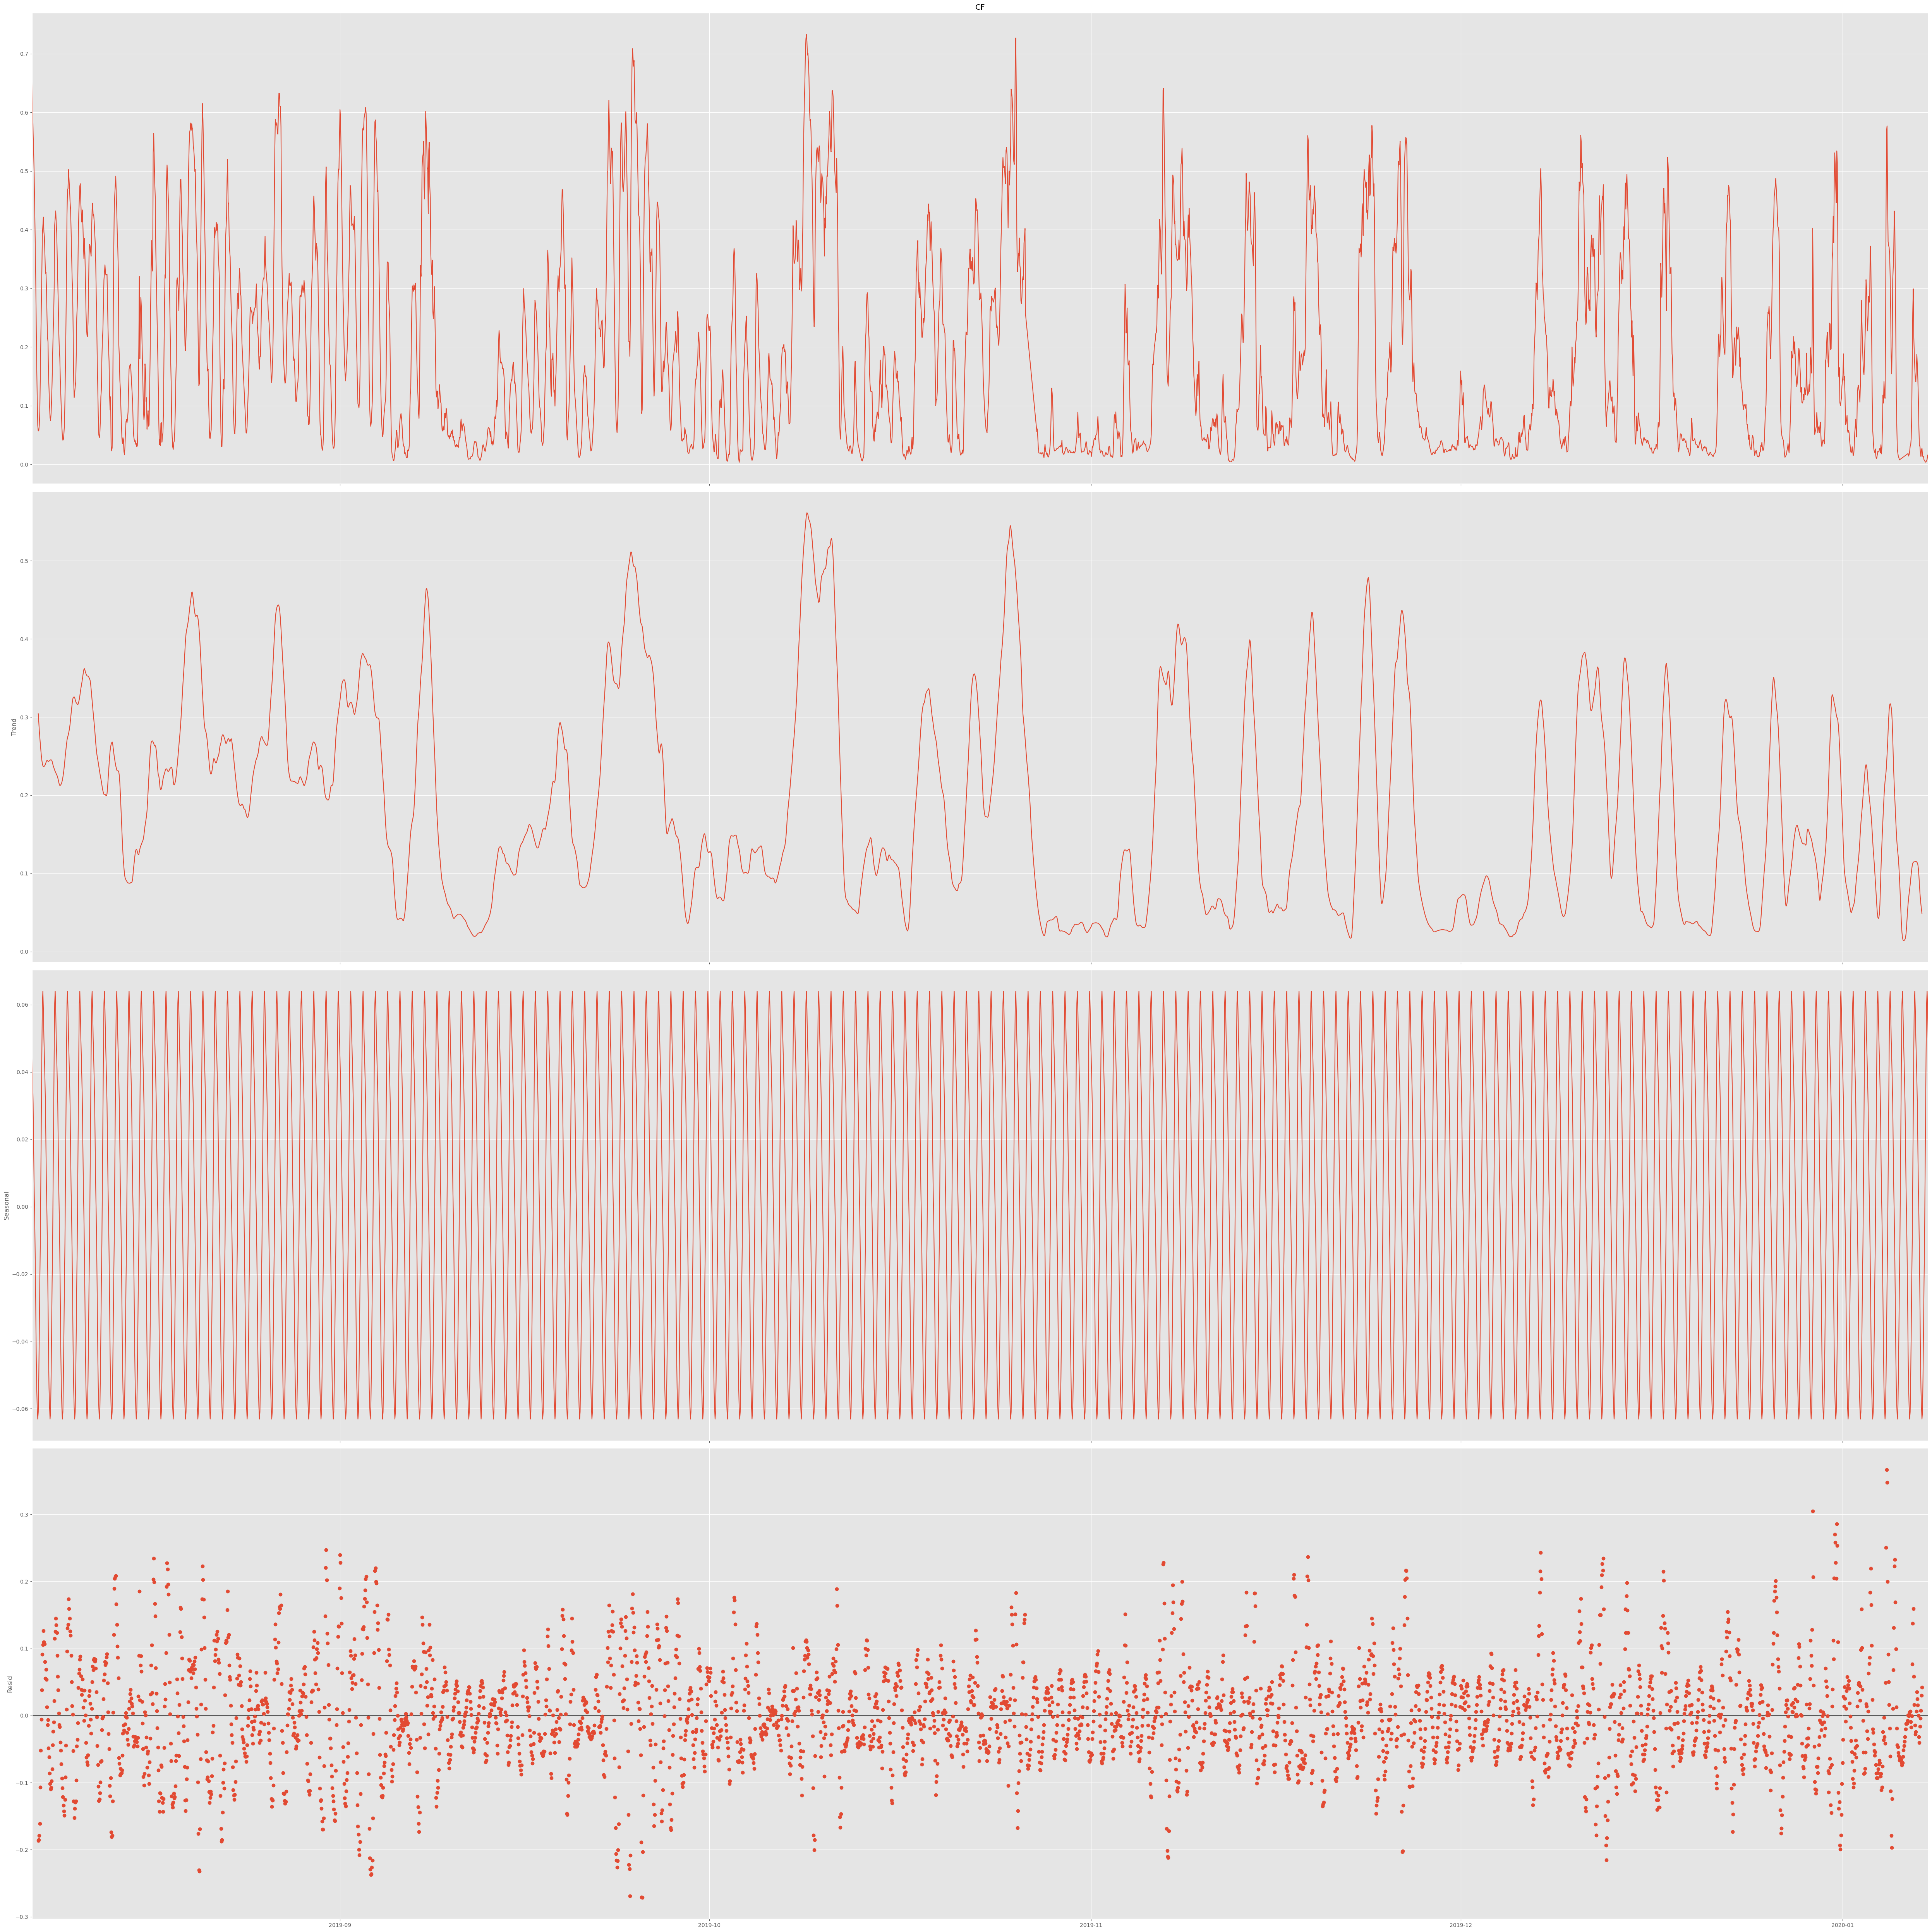

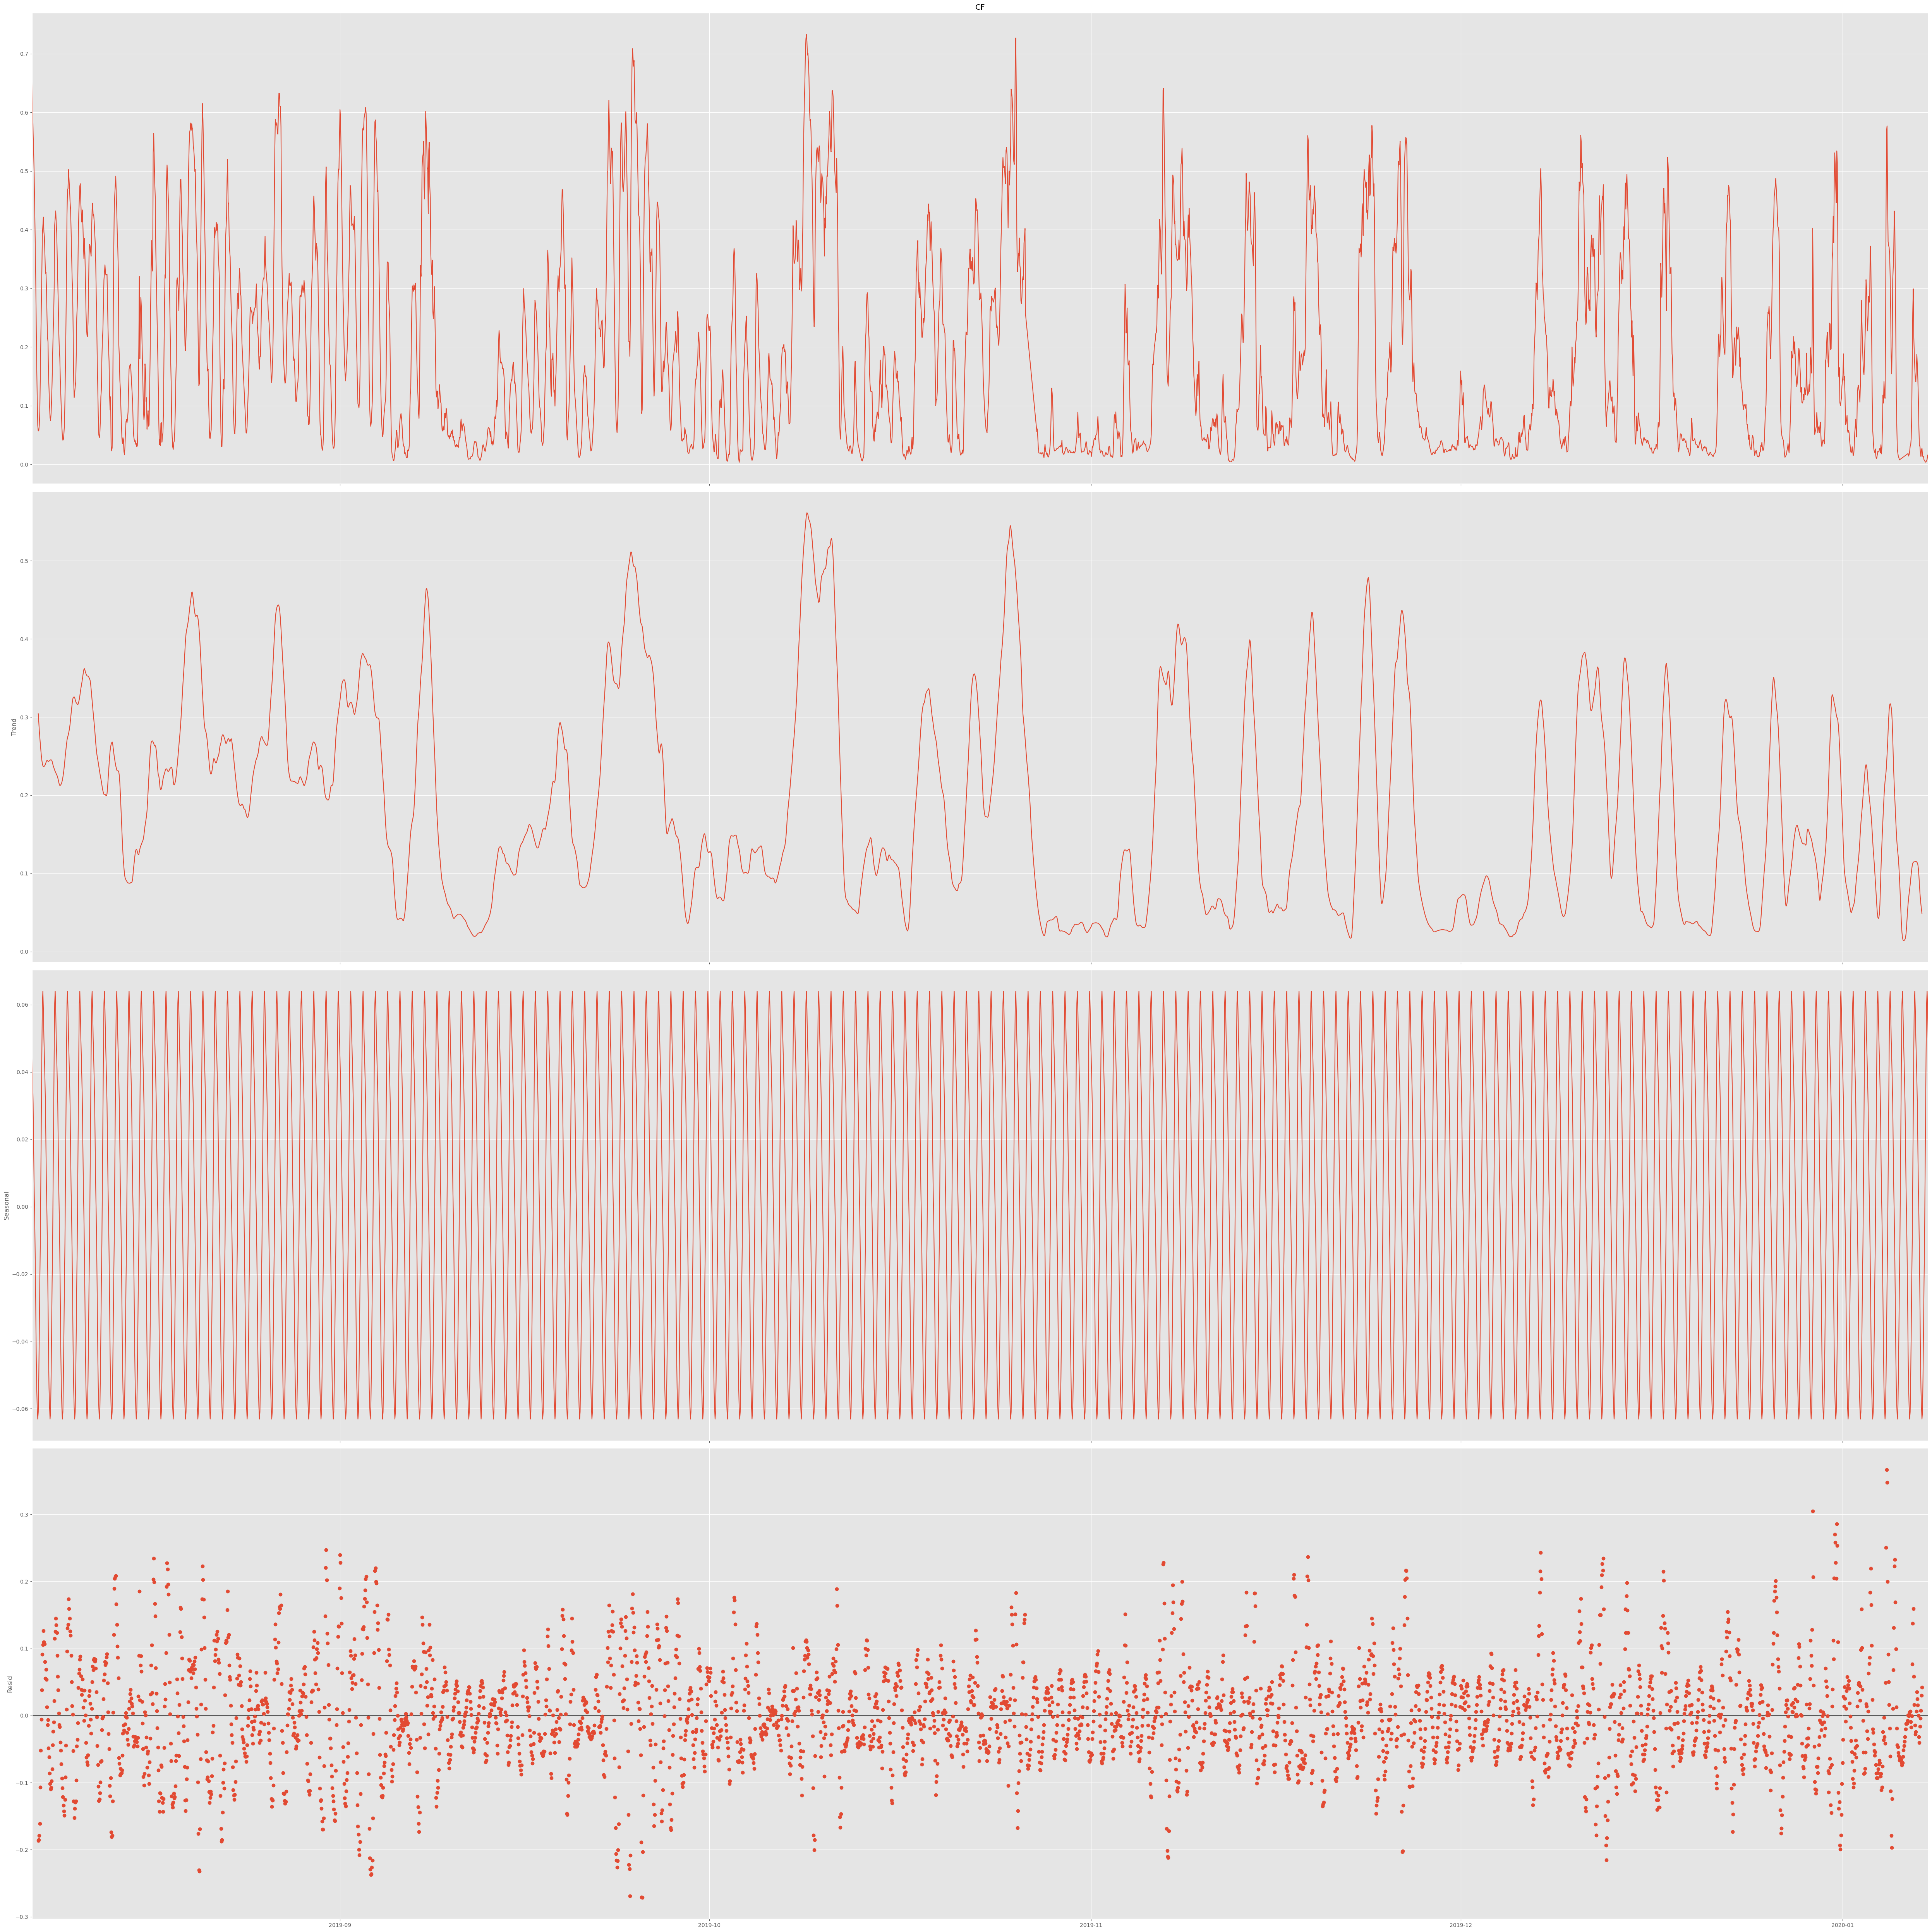

In [125]:
import statsmodels.api as sm
from matplotlib import style
plt.rcParams.update({'figure.figsize': (50,50)})
decomposition = sm.tsa.seasonal_decompose(wind_farms_data_validated_interpolated['CF'], model='additive', period=24)
style.use('ggplot')
decomposition.plot()

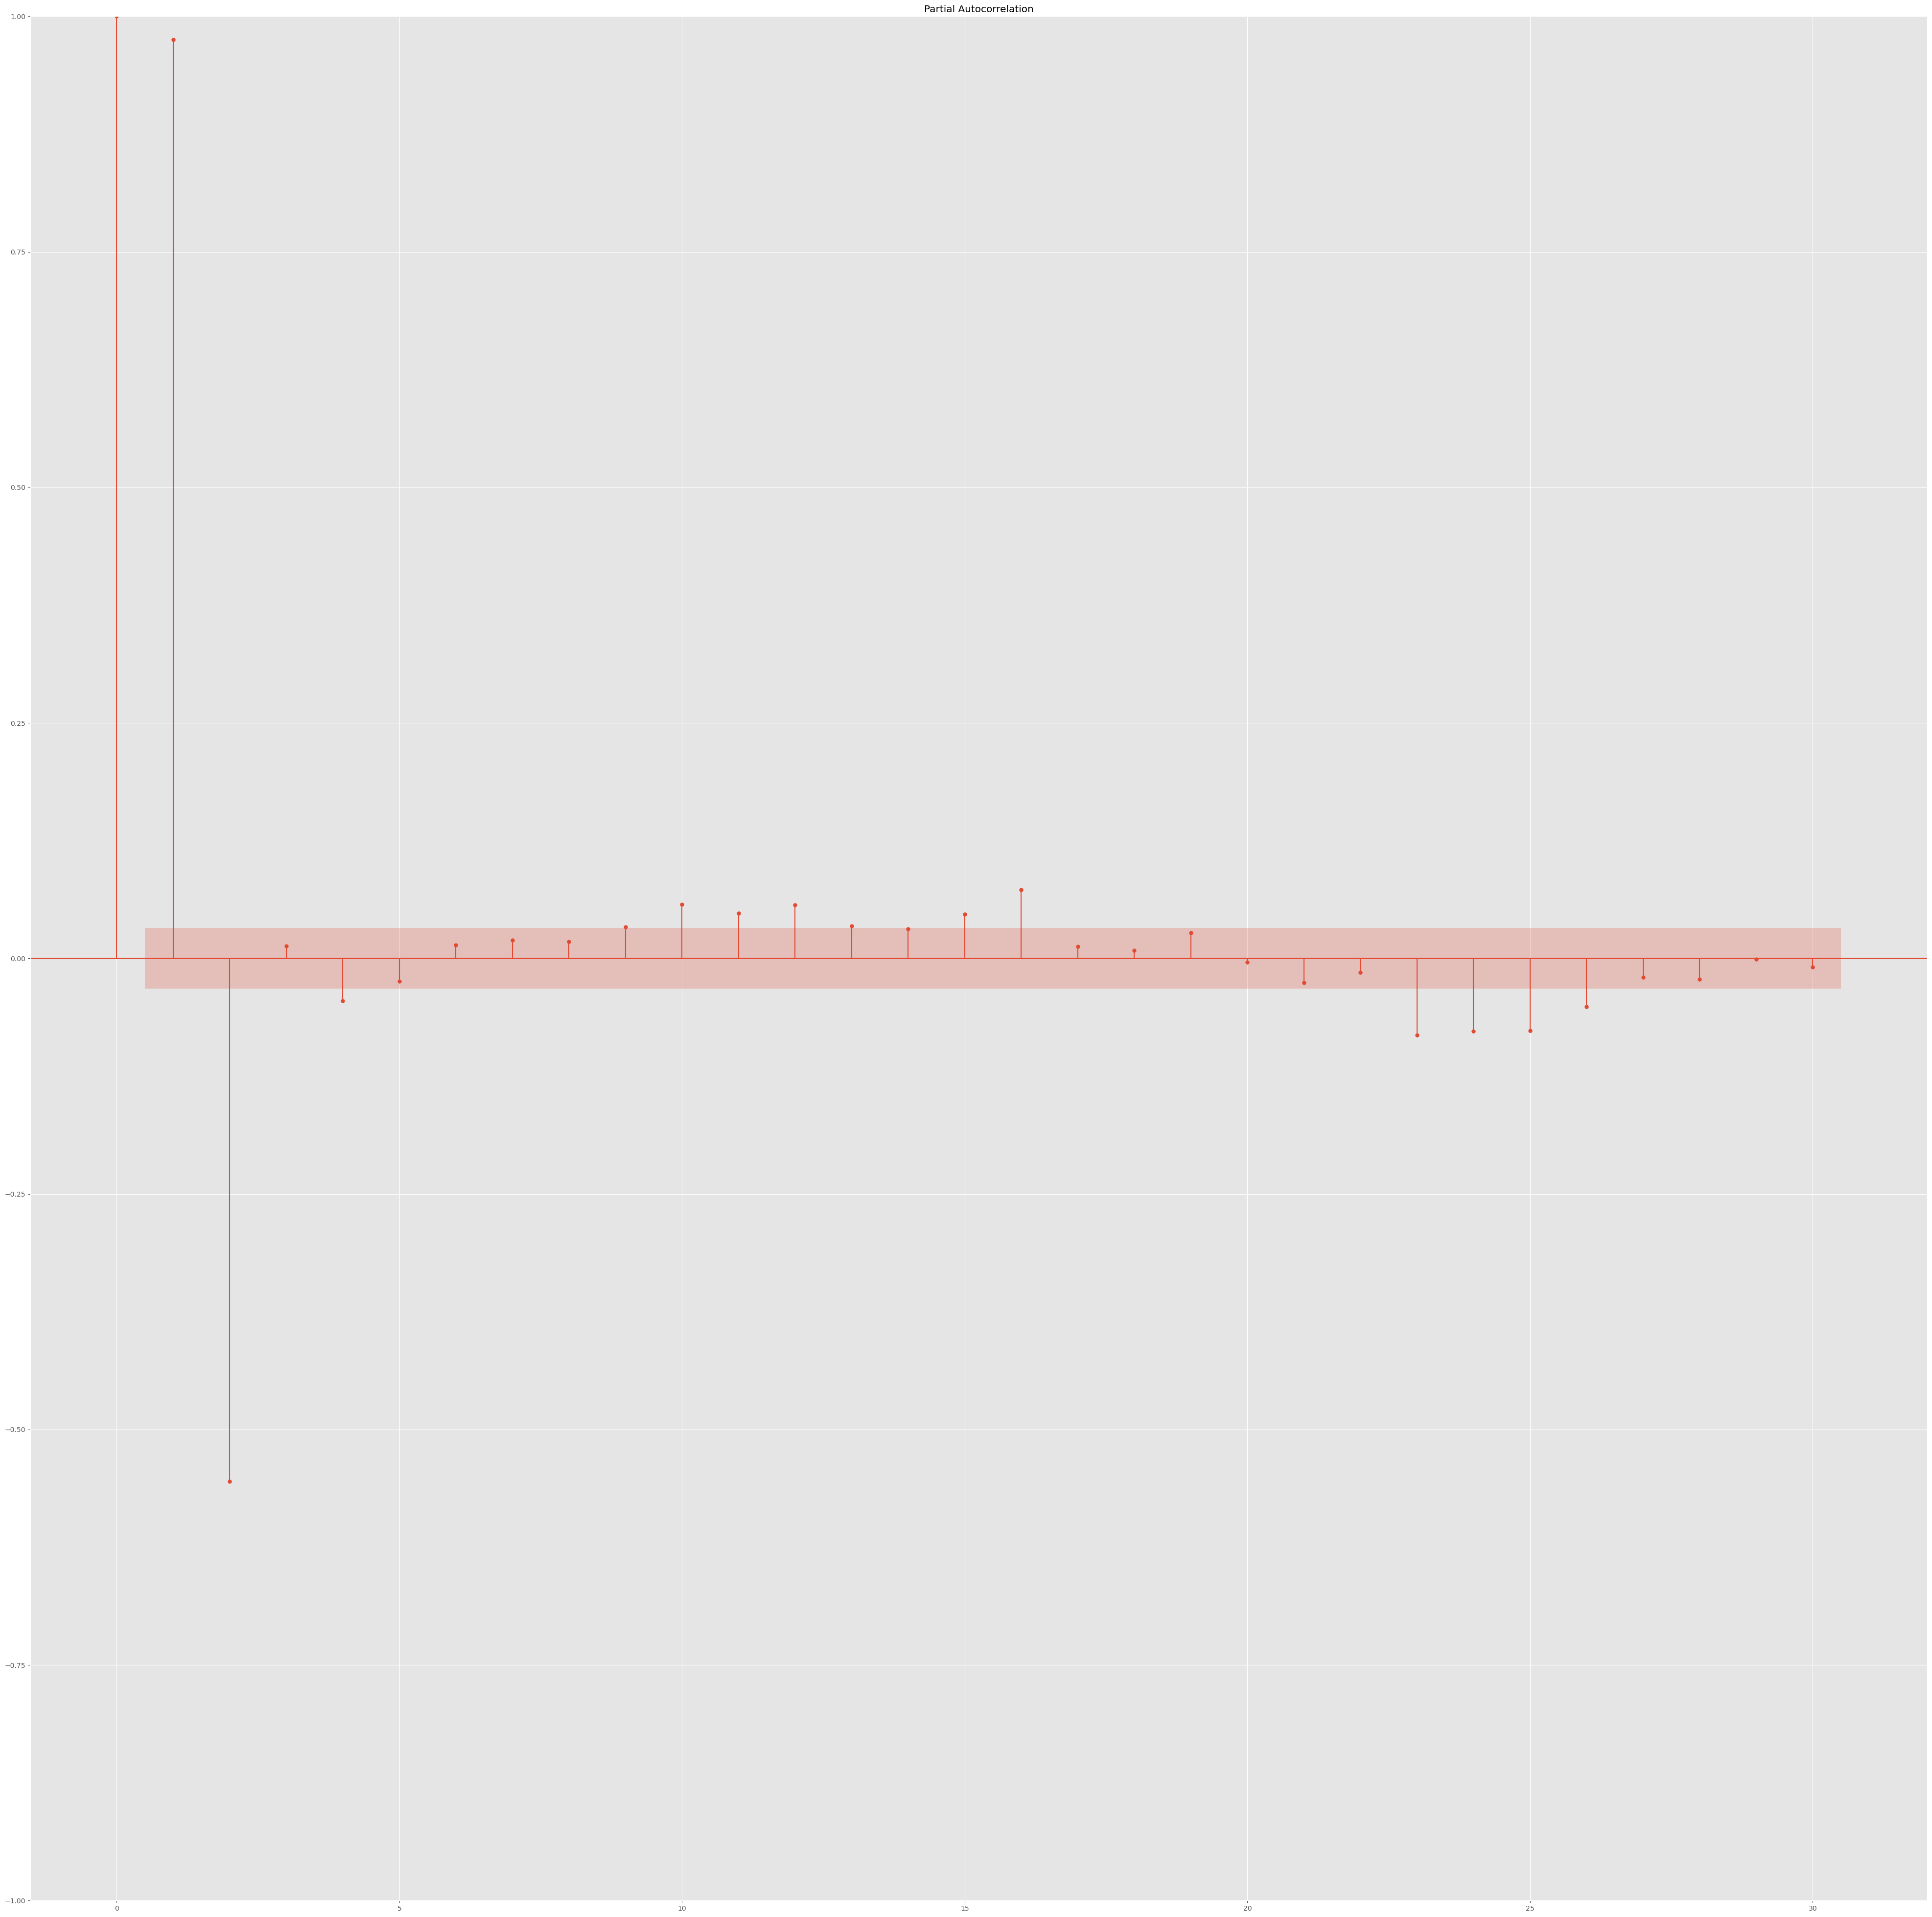

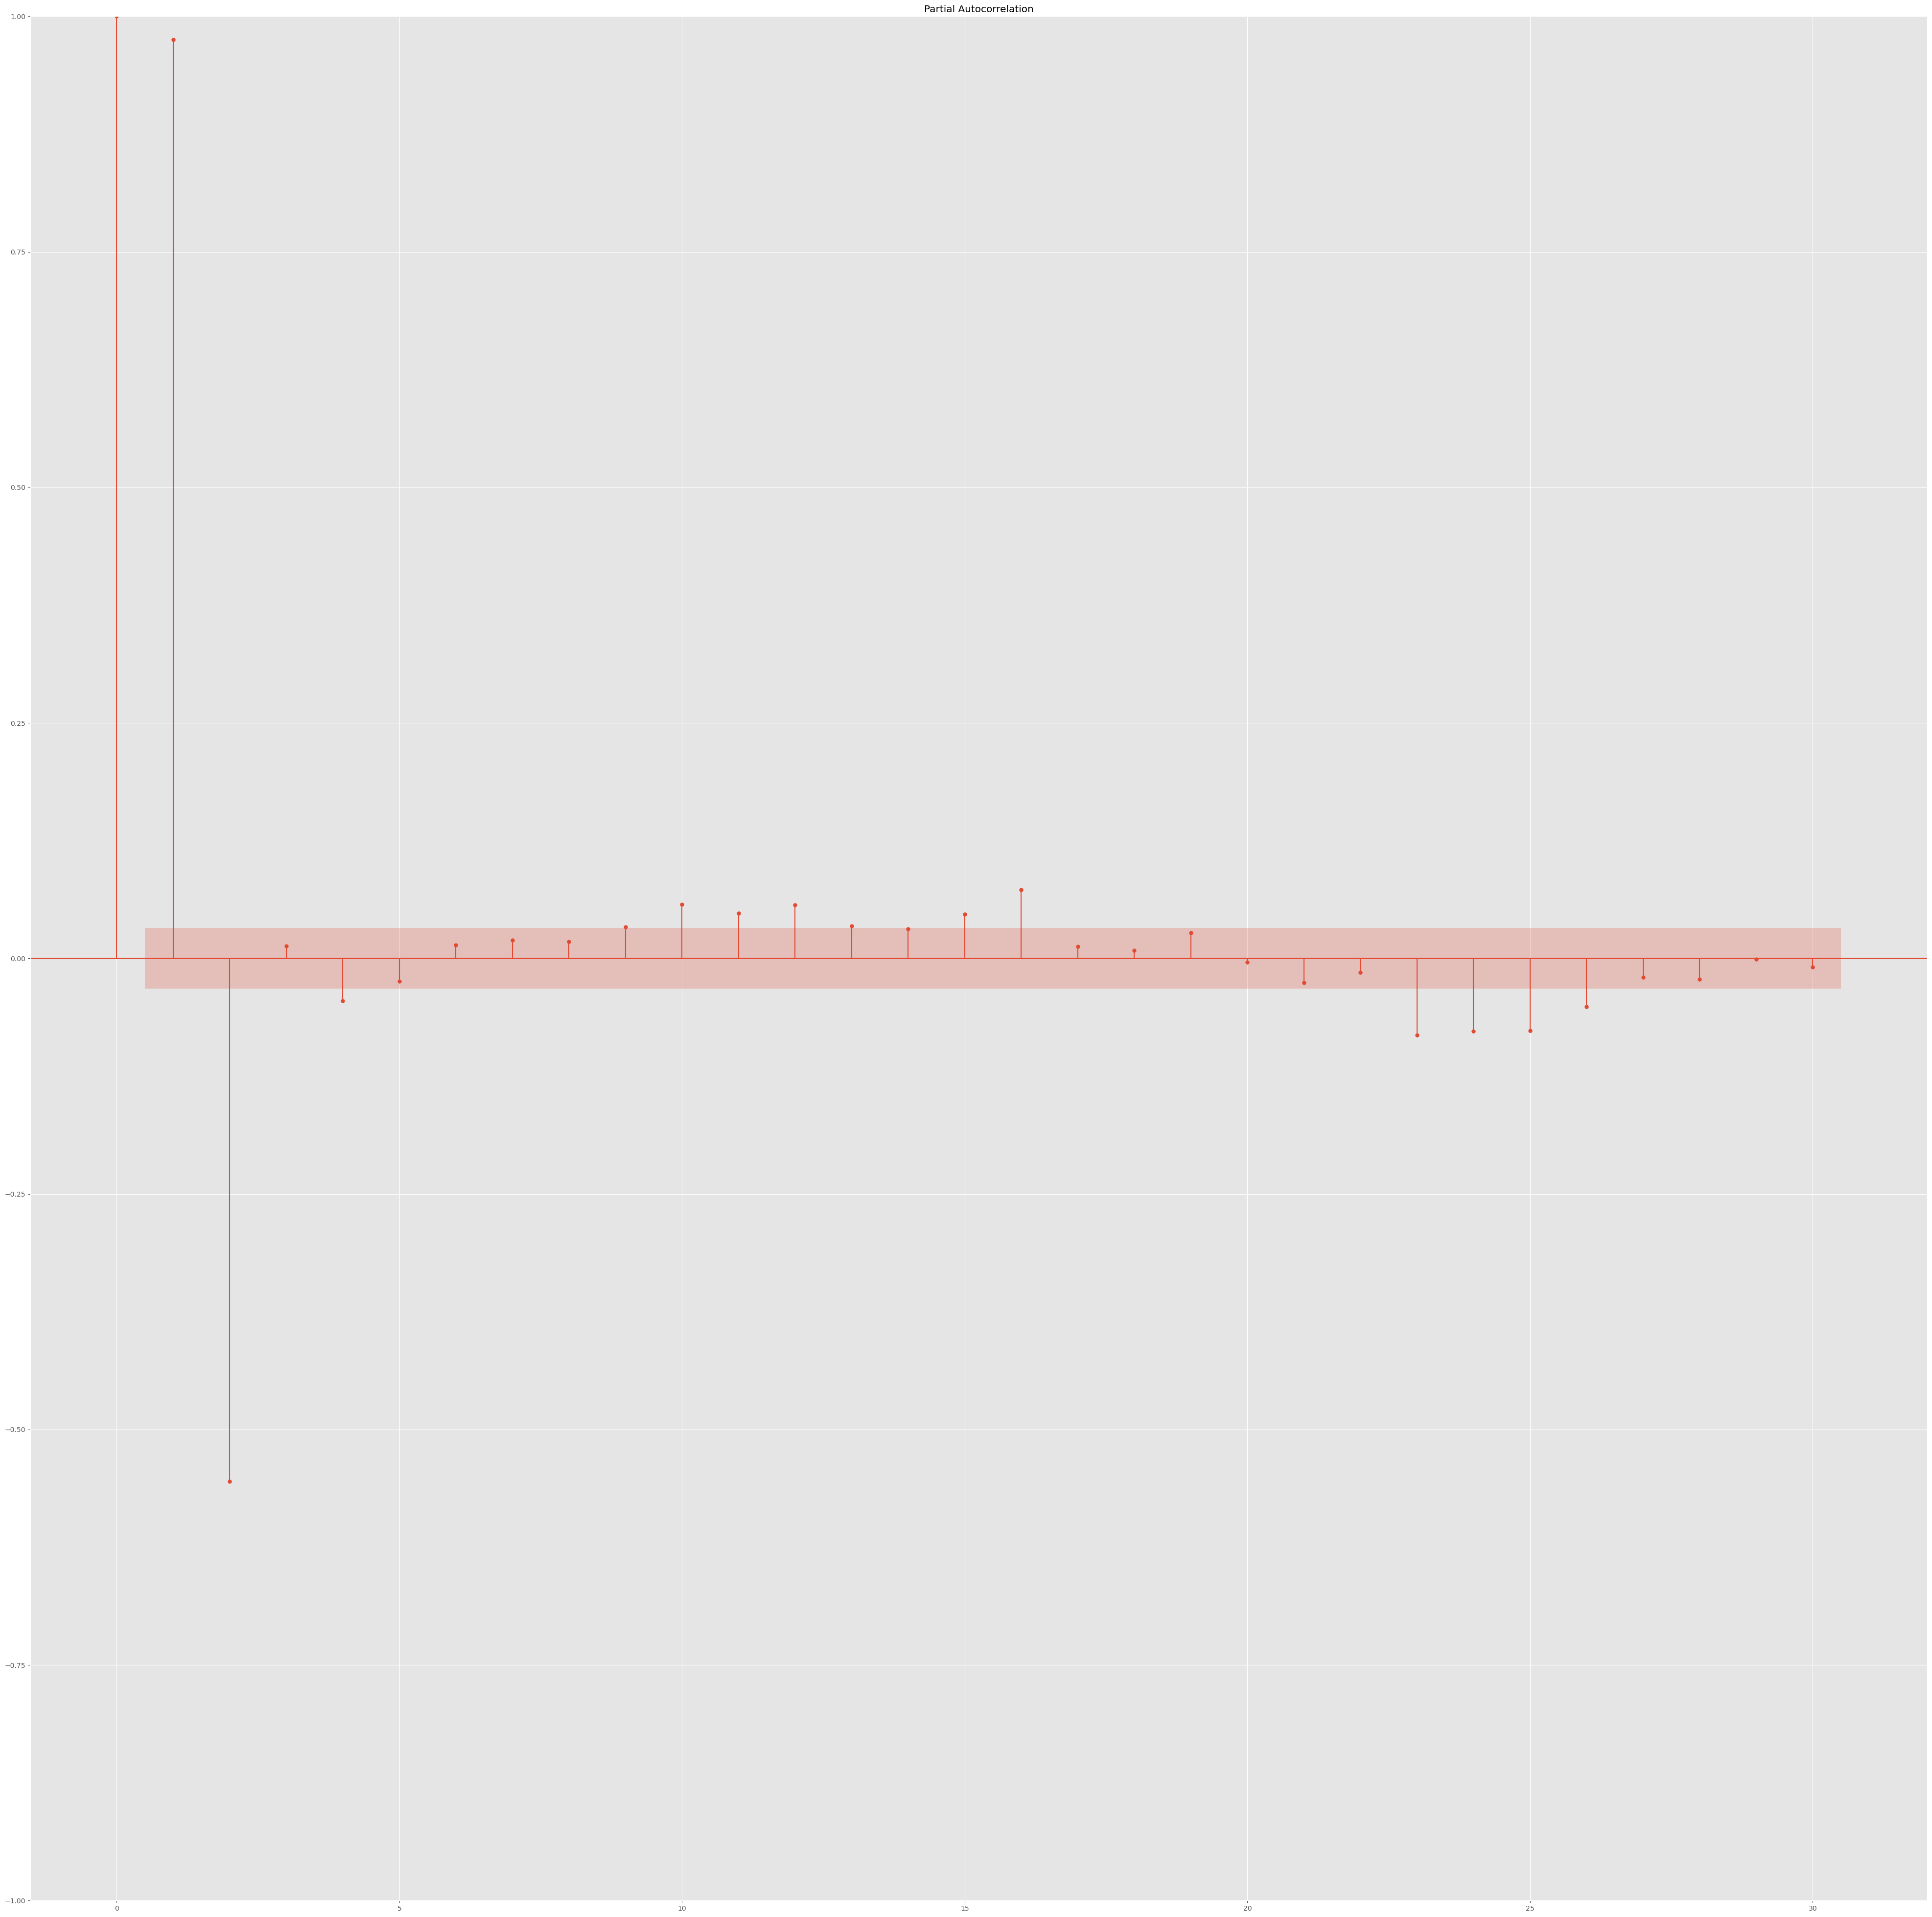

In [126]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


plot_pacf(wind_farms_data_validated_interpolated['CF'], lags=30)  
# Time series seems stationary, check for stationarity to confirm the type of series
# Lags 1, 2, 3, 23 have strong correlation. However, the prediction needs to be made for values 24 hours out , therefore, these would not be included as features 

# Lags 24, 25, 26 have correlation. These could be utilized as features for the prediction 